In [1]:
import torch

from txai.utils.predictors.loss import Poly1CrossEntropyLoss
from txai.trainers.train_transformer import train
from txai.models.encoders.transformer_simple import TransformerMVTS
from txai.utils.data import process_Synth
from txai.utils.predictors import eval_mvts_transformer
from txai.synth_data.simple_spike import SpikeTrainDataset
from txai.utils.data import EpiDataset
from txai.utils.data.preprocess import process_MITECG

In [4]:
trainEpi, val, test = process_MITECG(split_no = 1, device = None, base_path = '/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/datasets/MITECG-Simple/')

y tensor([0., 1.])


In [5]:
X, times, y = (trainEpi.X, trainEpi.time, trainEpi.y)

In [14]:
split_inds = torch.load("/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/datasets/MITECG-Simple/split=1.pt")

In [15]:
exp_info = torch.load('/n/data1/hms/dbmi/zitnik/lab/users/owq978/TimeSeriesCBM/datasets/MITECG-Simple/exp_info.pt')

In [18]:
exp_info['concept_tokens']
split_inds

(tensor([26204,  7269,  5964,  ..., 27118, 12981, 24193], dtype=torch.int32),
 tensor([ 5469, 14463,  5317,  ...,  6090, 24336, 26980], dtype=torch.int32),
 tensor([    6,     7,    10,  ..., 29985, 29986, 29993], dtype=torch.int32))

In [27]:
# Sample from each:
ctok = exp_info['concept_tokens'][split_inds[0]]

def get_rand_for_ctok(ctok):
    unique_integers = torch.unique(ctok)

    # sample a random index for each unique integer
    random_indices = torch.zeros_like(unique_integers, dtype=torch.int64)
    for i, integer in enumerate(unique_integers):
        indices = torch.where(ctok == integer)[0]
        random_idx = indices[torch.randint(len(indices), size=(1,))].item()
        random_indices[i] = random_idx

    return random_indices


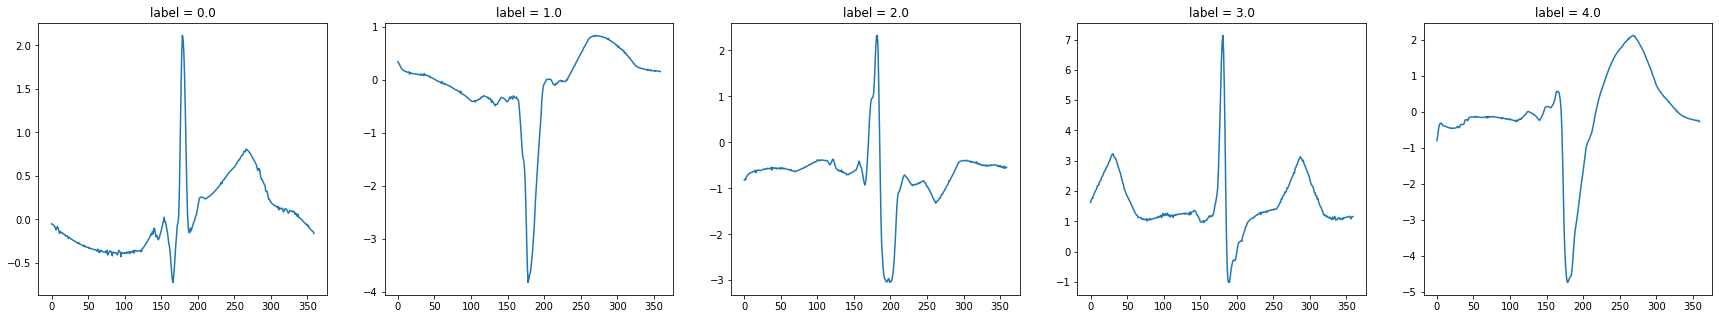

In [28]:
import matplotlib.pyplot as plt
random_indices = get_rand_for_ctok(ctok)
fig, ax = plt.subplots(1, 5, figsize = (30, 5))
for i in range(5):
    ax[i].plot(X[:,random_indices[i],0])
    ax[i].set_title('label = {}'.format(ctok[random_indices[i]].item()))
    
plt.show()

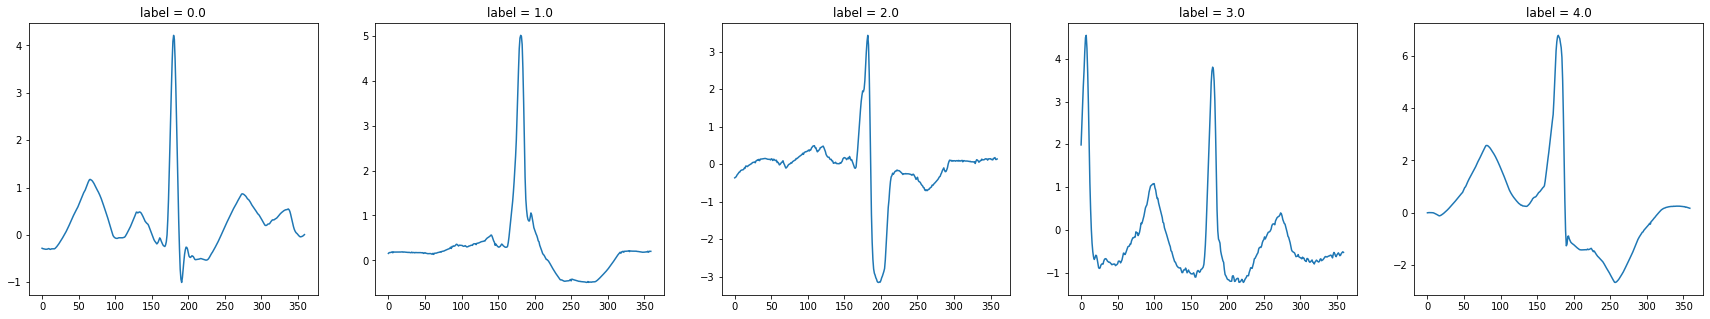

In [29]:
import matplotlib.pyplot as plt
random_indices = get_rand_for_ctok(ctok)
fig, ax = plt.subplots(1, 5, figsize = (30, 5))
for i in range(5):
    ax[i].plot(X[:,random_indices[i],0])
    ax[i].set_title('label = {}'.format(ctok[random_indices[i]].item()))
    
plt.show()

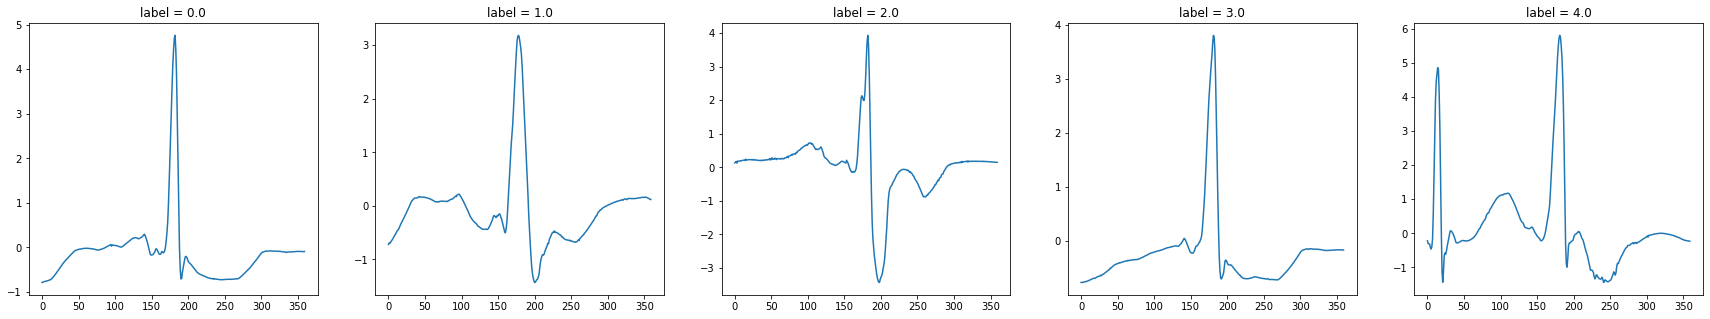

In [30]:
import matplotlib.pyplot as plt
random_indices = get_rand_for_ctok(ctok)
fig, ax = plt.subplots(1, 5, figsize = (30, 5))
for i in range(5):
    ax[i].plot(X[:,random_indices[i],0])
    ax[i].set_title('label = {}'.format(ctok[random_indices[i]].item()))
    
plt.show()

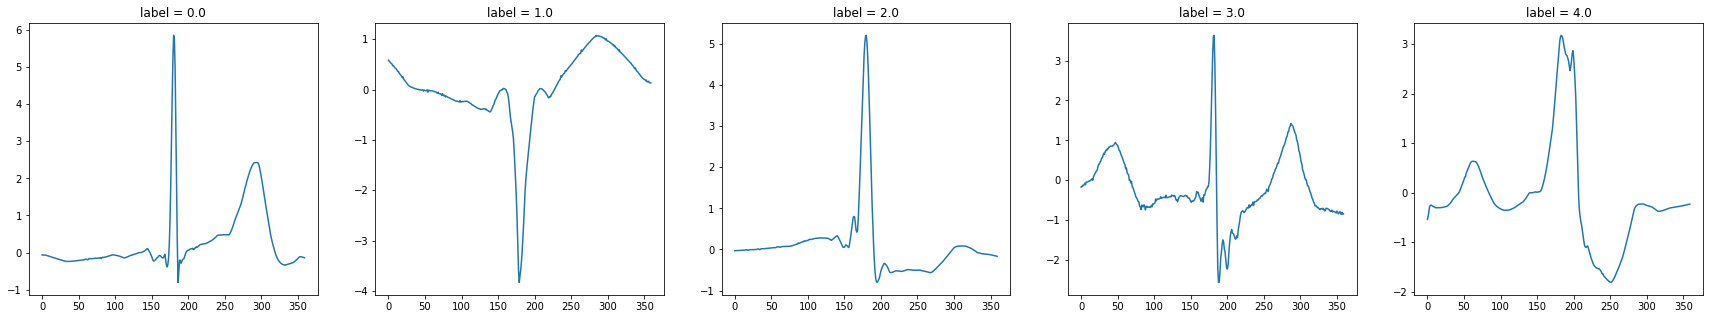

In [32]:
import matplotlib.pyplot as plt
random_indices = get_rand_for_ctok(ctok)
fig, ax = plt.subplots(1, 5, figsize = (30, 5))
for i in range(5):
    ax[i].plot(X[:,random_indices[i],0])
    ax[i].set_title('label = {}'.format(ctok[random_indices[i]].item()))
    
plt.show()

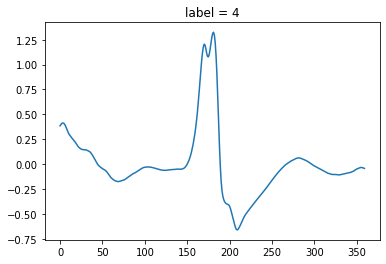

In [42]:
plt.plot(X[:,ctok == 4,0].mean(dim=1))
plt.title('label = 4')
plt.show()

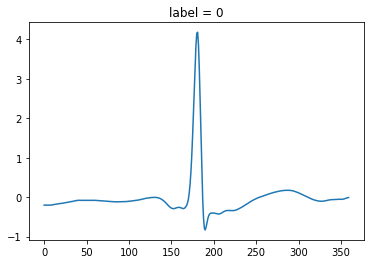

In [43]:
plt.plot(X[:,ctok == 0,0].mean(dim=1))
plt.title('label = 0')
plt.show()

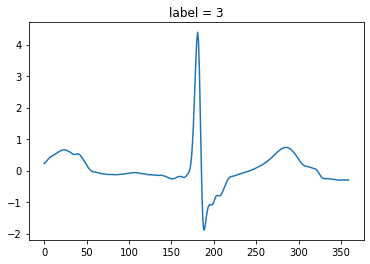

In [44]:
plt.plot(X[:,ctok == 3,0].mean(dim=1))
plt.title("label = 3")
plt.show()

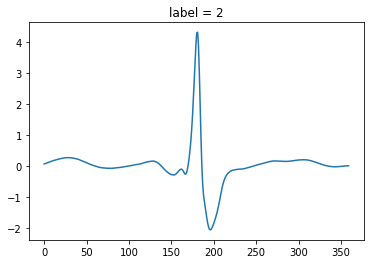

In [45]:
plt.plot(X[:,ctok == 2,0].mean(dim=1))
plt.title("label = 2")
plt.show()

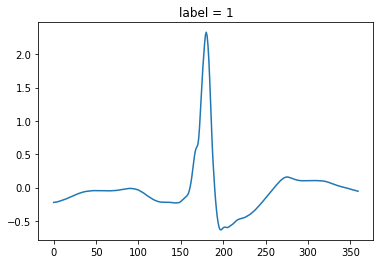

In [46]:
plt.plot(X[:,ctok == 1,0].mean(dim=1))
plt.title("label = 1")
plt.show()

In [48]:
# Build concept bank:
X0 = X[:,ctok == 0,0].mean(dim=1).unsqueeze(1)
mask0 = torch.zeros_like(X0).float()
mask0[100:250,:] = 1.0

X1 = X[:,ctok == 1,0].mean(dim=1).unsqueeze(1)
mask1 = torch.zeros_like(X1).float()
mask1[100:250,:] = 1.0

X2 = X[:,ctok == 2,0].mean(dim=1).unsqueeze(1)
mask2 = torch.zeros_like(X2).float()
mask2[100:250,:] = 1.0

X3 = X[:,ctok == 3,0].mean(dim=1).unsqueeze(1)
mask3 = torch.zeros_like(X3).float()
mask3[100:250,:] = 1.0

X4 = X[:,ctok == 4,0].mean(dim=1).unsqueeze(1)
mask4 = torch.zeros_like(X4).float()
mask4[100:250,:] = 1.0

In [49]:
Xconc = torch.stack([X0, X1, X2, X3, X4], dim = 1)
mask_conc = torch.stack([mask0, mask1, mask2, mask3, mask4], dim = 1)

In [50]:
times_conc = times[:,:5]

In [51]:
torch.save((Xconc, times_conc, mask_conc), 'golden_concepts_tuple.pt')